In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
%matplotlib inline
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')


In [8]:
data=pd.read_csv("C:\\Users\HP\OneDrive\Desktop\WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
data.describe() #it describes only continous data categorical data are left out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
#as we can see all records are full and none nan is there still we check nan for ctegoricsl features that were 
#not described in describe method.


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
#Now we confirm that there is no nan in the whole data set and we can so ahead.
#Suppose if we find any column with categoical values and want to replace it with numerical we will use
# from sklearn.preprocessing  import OrdinalEncoder(notein ordina; encoder we prioties the categories as per weightage )
#ord_encoder=OrdinalEncoder(categories=[['give data according to order you want to priotize']])
#df1=ord_encoder.fit_transform(data[['column name that wants to be replaced']])
#df1
#adding this new attributes to the main dataset
#data['column that you want to protize']=df1# this will overwrite category name with numericals.


In [10]:
# we drop id feature as it has no use for our model
data=data.drop(columns=['Id'])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Now lets try to reduce the features using different techniques
#Lets plot the heat map to visulalize and find multicollinear coefficient  or coefficient.

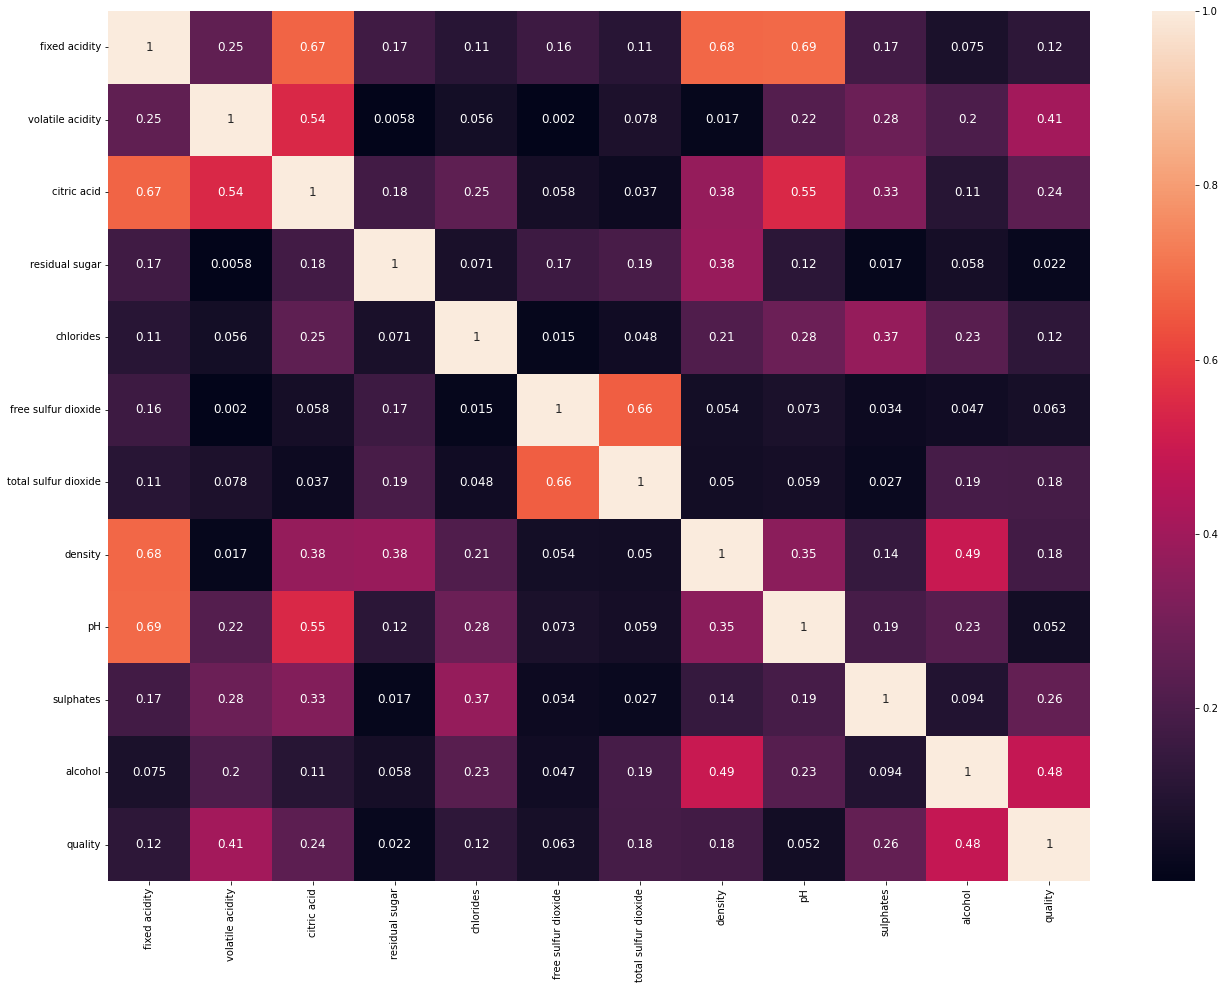

In [4]:
df_corr=data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

In [ ]:
#This data shows how all features are related to each other and realtion with label and are in range -1 to 1 (i.e
# it gives corelation coefficient)
#Those features who ever are strongly realted can be dropped mainly we drop categorical column.and the feature that
#is less corelated with label
#Before dropping we visualize it for assurance :i.e make sure they are corelated (i.e they follow some trend)
#here in this data we dont find any such collinaearity so use scatter plot and visualise.
#Here we do not find such collinearity so we move ahead.


In [11]:
X=data.drop(columns=['quality'])
y=data['quality']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=8473)


In [ ]:
#Lets first visualsize the tree on the data without doing any preprocessin


In [13]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [14]:
 clf.score(x_train,y_train)#Thhis is training score  
    

1.0

In [15]:
y_pred=clf.predict(x_test)

In [16]:
accuracy_score(y_test,y_pred)

0.5384615384615384

In [ ]:
#Now lets try to tune some hyperparameters using the grid search algoriyhm

In [14]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),#THE MIninum no of sample require to be at a leaf node
    'min_samples_split':range(3,10),
    'max_leaf_nodes': range(2,4)
}
    


In [15]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5)

In [16]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [17]:
best_parameters=grid_search.best_params_
print(best_parameters)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [27]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=3,min_samples_split=3,max_depth=10,min_samples_leaf=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=3, min_samples_leaf=2,
                       min_samples_split=3)

In [28]:
y_pred=clf.predict(x_test)



In [29]:
accuracy_score(y_test,y_pred)

0.5769230769230769

In [ ]:
#Earlier it was 54 now it is 60 so by hyper parameter tuning we increase the accuracy of the model.

In [30]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree_hype.png")
Image(graph.create_png())

NameError: name 'export_graphviz' is not defined